In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



newColNames = ['date', 'contestNum', 'word', 'numResults', 'numHard', 'oneTry', 'twoTry', 'threeTry', 'fourTry', 'fiveTry', 'sixTry', 'sevenTry']



def readData(filename, colNames=newColNames, pdArray=False):
    df = pd.read_csv(str(filename))
    # rename columns
    df.columns=colNames
    # add means
    df['means'] = guessStats(df.values)
    # can output as either numpy array or pandas dataframe, default is nparray
    if pdArray:
        return df
    else:
        return df.values

def guessStats(data):
    tries = data[:,5:12].T
    tries = tries / 100
    mean = (tries[0]) + (2 * tries[1]) + (3 * tries[2]) + (4* tries[3]) + (5 * tries[4]) + (6 * tries[5]) + (7 * tries[6])
    return mean.astype('float64')

data = readData('Problem_C_Data_Wordle.csv', pdArray=True)

print(data)

         date  contestNum   word  numResults  numHard  oneTry  twoTry  \
0    12/31/22         560  manly       20380     1899       0       2   
1    12/30/22         559  molar       21204     1973       0       4   
2    12/29/22         558  havoc       20001     1919       0       2   
3    12/28/22         557  impel       20160     1937       0       3   
4    12/27/22         556  condo       20879     2012       0       2   
..        ...         ...    ...         ...      ...     ...     ...   
354   1/11/22         206  drink      153880     3017       1       9   
355   1/10/22         205  query      107134     2242       1       4   
356    1/9/22         204  gorge       91477     1913       1       3   
357    1/8/22         203  crank      101503     1763       1       5   
358    1/7/22         202  slump       80630     1362       1       3   

     threeTry  fourTry  fiveTry  sixTry  sevenTry  means  
0          17       37       29      12         2   4.34  
1    

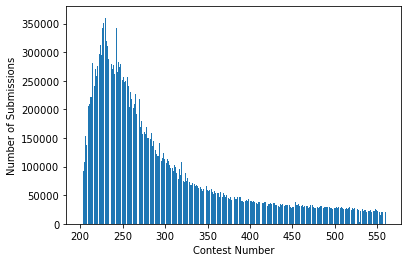

-0.01214057195325275


In [16]:
plt.bar(data['contestNum'], data['numResults'])
plt.xlabel('Contest Number')
plt.ylabel('Number of Submissions')
plt.show()

corrolations= data['numResults'].corr(data['means'])
print(corrolations)

#When more people play, the mean number of tries actually goes down (slightly)
#More people play as the year goes on, In theory the mean scores should drop too (slightly)


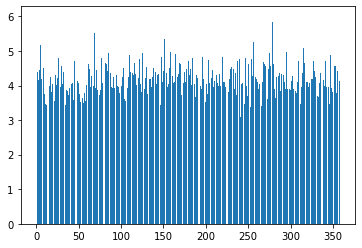

In [14]:
plt.bar(data.index, data['means'])
plt.show()

In [58]:
Outliers_high= data[data['means']>= 4.94]

Outliers_high

,date,contestNum,word,numResults,numHard,oneTry,twoTry,threeTry,fourTry,fiveTry,sixTry,sevenTry,means
5,12/26/22,555,judge,20011,2043,0,2,8,16,26,33,14,5.18
69,10/23/22,491,mummy,29279,3021,0,1,4,14,27,37,18,5.53
85,10/7/22,475,dandy,29026,2840,0,2,11,23,29,24,11,4.95
106,9/16/22,454,parer,37309,4130,0,0,4,11,15,22,48,5.99
151,8/2/22,409,coyly,34909,3380,0,0,4,17,28,35,15,5.35
158,7/26/22,402,cinch,39171,3507,0,2,15,24,22,25,13,4.96
178,7/6/22,382,fluff,47344,4049,0,0,4,25,44,23,4,4.98
185,6/29/22,375,gawky,45645,3957,0,1,5,22,33,28,10,5.08
256,4/19/22,304,foyer,108899,8198,0,2,10,19,19,23,26,5.25
275,3/31/22,285,lowly,135219,8469,0,2,9,26,32,24,8,4.95


In [59]:
Outliers_low= data[data['means']<= 3.47]

Outliers_low

,date,contestNum,word,numResults,numHard,oneTry,twoTry,threeTry,fourTry,fiveTry,sixTry,sevenTry,means
11,12/20/22,549,third,24137,2261,1,10,47,32,9,2,0,3.47
12,12/19/22,548,slate,26010,2422,6,14,33,27,13,5,1,3.43
35,11/26/22,525,clen,26381,2424,1,17,36,31,12,3,0,3.45
147,8/6/22,413,alien,38841,3395,3,17,31,29,15,4,0,3.45
241,5/4/22,319,train,107750,7243,6,26,32,22,10,3,0,3.10
246,4/29/22,314,tash,106652,7001,2,19,34,27,13,4,1,3.46
253,4/22/22,307,plant,119232,7731,2,19,39,28,10,3,0,3.37
266,4/9/22,294,stair,134210,8537,2,21,36,26,11,4,1,3.42
285,3/21/22,275,their,173636,9200,2,14,36,30,13,4,0,3.47
312,2/22/22,248,thorn,306356,11814,1,14,38,30,12,4,0,3.47


In [51]:
bool_repeats= data["word"].str.match(r'.*(\w)\1')
#This checks if the data has repeating letters

repeating_letters_df= data[bool_repeats==True]
#Dataframe with only words that have repeating letters

def get_mean(data):
    total= (1*data['numResults']*data['oneTry']/100)+(2*data['numResults']*data['twoTry']/100)+(3*data['numResults']*data['threeTry']/100)+(4*data['numResults']*data['fourTry']/100)+(5*data['numResults']*data['fiveTry']/100)+(6*data['numResults']*data['sixTry']/100)+(7*data['numResults']*data['sevenTry']/100)
    total_mean= total.sum()/data['numResults'].sum()
    return total_mean
get_mean(repeating_letters_df)
get_mean(data)

#Here we see that words with repeating letters have a mean attempt number of 4.47 vs the 4.19 total for all words

4.187541271678199

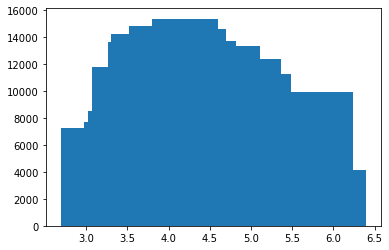

In [57]:
#Check corrolations bewteen numHard and means (very small positive corrolation)

data['numHard'].corr(data['means'])

plt.bar(data['means'], data['numHard'])
plt.show()

#Here we see that the number of people playing on hard actually drops when scores are outliers in either direction

In [68]:
j_frame= data.query('word.str.contains("j")')
get_mean(j_frame)

4.5693768005422815

In [69]:
x_frame= data.query('word.str.contains("x")')
get_mean(x_frame)

4.6390541585711835

In [71]:
q_frame= data.query('word.str.contains("q")')
get_mean(q_frame)

4.332062314204106